Regresi linear sederhana adalah suatu metode statistik yang digunakan untuk memodelkan hubungan antara satu variabel bebas (independen) dengan satu variabel terikat (dependen). Tujuan dari regresi sederhana adalah untuk memahami atau memprediksi perubahan pada variabel terikat yang disebabkan oleh perubahan pada variabel bebas. Adapun model dari regresi linear seedrhana adalah y=β 
0
​
 +β 
1
​
 ⋅x+ε

menginport import modul pandas 

In [1]:
import pandas as pd

load data set kedalam pandas 

In [2]:
df = pd.read_csv(r'E:/data_pengguna.csv')

In [3]:
df.head()

,user_id,Saham_AUM,user_age,user_gender,user_occupation,user_income_range,referral_code_used,user_income_source
0,162882,2272192,51,Female,Swasta,> Rp 500 Juta - 1 Miliar,non referal,Gaji
1,3485491,3815231,55,Female,Others,> Rp 50 Juta - 100 Juta,non referal,Gaji
2,1071649,49541,50,Male,Swasta,Rp 10 Juta - 50 Juta,non referal,Gaji
3,3816789,257448,53,Female,IRT,> Rp 50 Juta - 100 Juta,non referal,Gaji
4,3802293,9016238,47,Female,PNS,> Rp 500 Juta - 1 Miliar,used referral,Gaji


In [4]:
df.shape

(9398, 8)

dapat dilihat bahwa data set terdiri dari beberapa kolom, karena di sini saya hanya menggunakan regresi linear sderhana. maka variabel yang saya pilih adalah variabel user_age sebagai x dan variabel saham_aum sebagai y.

In [5]:
data = df[['Saham_AUM','user_age']]

In [6]:
data.head()

,Saham_AUM,user_age
0,2272192,51
1,3815231,55
2,49541,50
3,257448,53
4,9016238,47


In [7]:
data1 = data.groupby('user_age')['Saham_AUM'].mean().reset_index(name = 'Saham_AUM').astype('int')

In [8]:
data1.head()

,user_age,Saham_AUM
0,17,213376
1,18,141391
2,19,182944
3,20,149549
4,21,193425


In [9]:
data1.shape

(54, 2)

menginport model regresi linear menggunakan modul dari sklearn dan juga train_test_split untuk membagi data set menjadi data latih dan data test

In [10]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [11]:
X_train, X_test, y_train, y_test = train_test_split(data1[['user_age']], data1[['Saham_AUM']], test_size = 0.3, random_state = 43)

In [12]:
model = LinearRegression()
model.fit(X_test, y_test)
print(model.score(X_train, y_train))

-0.08915138277007428


dapat dilihat bahwa akurasi dari data train sangat buruk. dan juga pastinya akurasi untuk data test kurang lebih sama

In [13]:
data1.corr()

,user_age,Saham_AUM
user_age,1.000000,0.151131
Saham_AUM,0.151131,1.000000


dapat pula diliat bahwa user_age dan Saham_AUM tidak berkorelasi hal itulah yang membuat akurasinya sangat buruk

In [14]:
import matplotlib.pyplot as plt

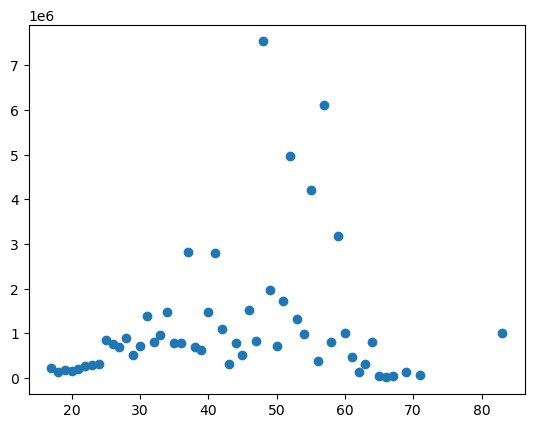

In [15]:
plt.scatter(data1['user_age'], data1['Saham_AUM']);

begitu pula dapat dilihat pada scatter plot antara saham_aum dan user age tanpak tidak berarturan
sehingga tidak cocok jika dimodelkan menggunakan regresi linear sederhana.